In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import datasets,layers, models
import matplotlib.pyplot as plt
%matplotlib inline

2023-07-13 16:46:35.519692: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-13 16:46:35.548574: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-13 16:46:35.784380: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-13 16:46:35.785886: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-13 16:46:37.956726: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
(train_images,train_labels) , (test_images,test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images/255.0, test_images/255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
train_images.shape

(50000, 32, 32, 3)

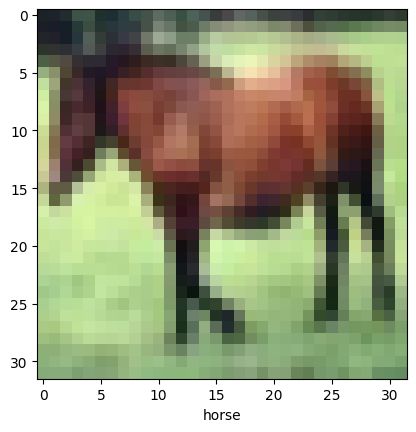

In [5]:
IMG_INDEX = 7

plt.imshow(train_images[IMG_INDEX], cmap= plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [10]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)

history = model.fit(train_images,train_labels,epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 38s 23ms/step - loss: 1.5346 - accuracy: 0.4410 - val_loss: 1.4647 - val_accuracy: 0.4668
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.1599 - accuracy: 0.5894 - val_loss: 1.1243 - val_accuracy: 0.6093
Epoch 3/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0044 - accuracy: 0.6485 - val_loss: 1.0315 - val_accuracy: 0.6353
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9035 - accuracy: 0.6849 - val_loss: 0.9186 - val_accuracy: 0.6766
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8328 - accuracy: 0.7087 - val_loss: 0.9475 - val_accuracy: 0.6734
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7714 - accuracy: 0.7313 - val_loss: 0.8665 - val_accuracy: 0.7002
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7207 - accuracy: 0.7482 - val_loss: 0.8760 -

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print(test_acc)

313/313 - 2s - loss: 0.9172 - accuracy: 0.7002 - 2s/epoch - 7ms/step
0.7002000212669373


In [12]:
predictions = model.predict(test_images)

313/313 [==============================] - 2s 7ms/step


airplane


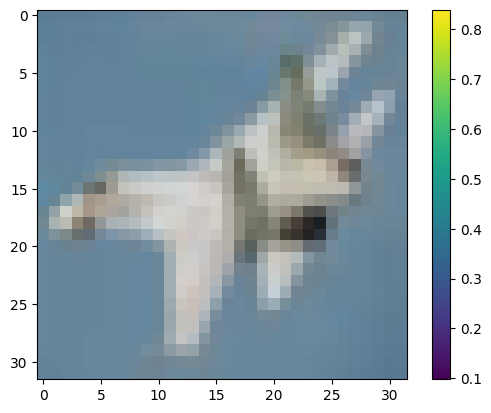

In [13]:
print(class_names[np.argmax(predictions[10])])
plt.figure()
plt.imshow(test_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

Working with small datasets

Data Augmentation

In [14]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

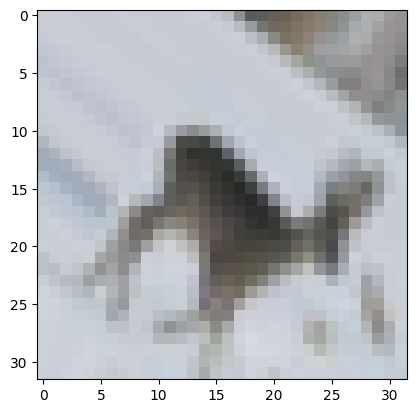

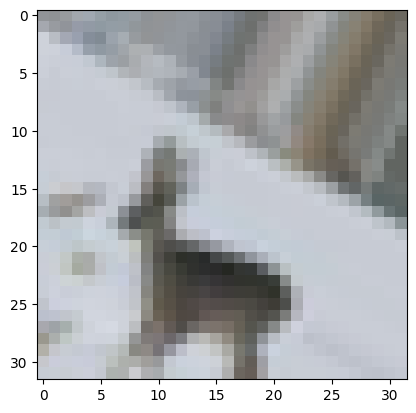

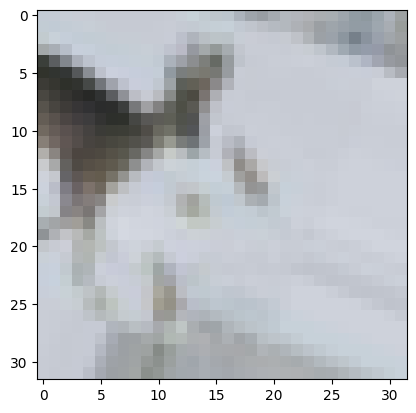

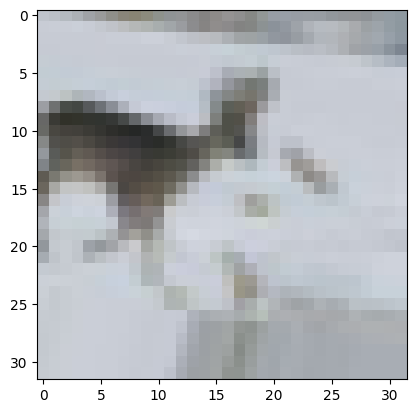

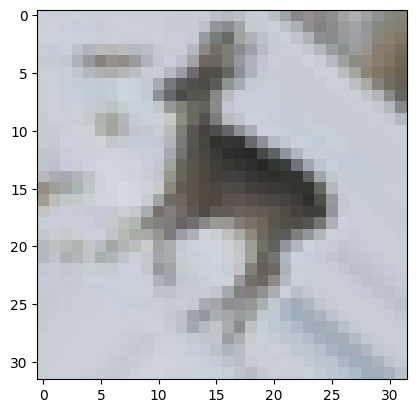

In [15]:
datagen = ImageDataGenerator(
    rotation_range= 40,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True,
    fill_mode= 'nearest'
)

# picking an image to transform

test_img = train_images[20]
img = image.img_to_array(test_img) # convert image to numpy array
img = img.reshape((1,) + img.shape)

i = 0

for batch in datagen.flow(img, save_prefix='test' , save_format='jpeg'):
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:
        break
    
    
plt.show()